# Overview and Goal

### Enron at its prime
Enron was awarded "America's Most Innovative Company" by Fortune Magazine for 6 consecutive years between 1996 and 2001 (https://www.investopedia.com/updates/enron-scandal-summary/) and was arguably one of the big coorporate players in the United States and worldwide, respectively. In fact, Enron was ranked the sixt-largest energy company in the world and ranked No. 7 on the Fortune 500 list in 2000 with the company's shares being worth almost \$100 in that same year (http://edition.cnn.com/2013/07/02/us/enron-fast-facts/index.html). before dropping to approximately $1 in 2001
In 2001 An investigation was launched by the U.S. Securities and Exchange Commission 



### Enron's Fall
So only one year aftre the perennial rally for "America's hottest company", Enron's shares dropped under $1 (http://edition.cnn.com/2013/07/02/us/enron-fast-facts/index.html)!! So what caused the fall of such a corporate giant??
The Enron case unraveled one of the biggest accounting frauds in U.S. history. A large network of acquired partner companies was used to specificically process Enron's liabilities, whereas the parent company Enron solely registered profits in their balance sheet (https://www.capital.de/wirtschaft-politik/der-enron-skandal). 
Eventually, Enron filed for bankruptcy in 2001 (http://edition.cnn.com/2013/07/02/us/enron-fast-facts/index.html).


### Project Goal
The aim of this project is to use machine learning in order to develop a classifier that can successfully identify individuals that were involved in the enron fraud case. Ultimatly, the classifier could be used to assist in fraud detection providing similar but unseen data.



## Import relevant packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from collections import defaultdict
import re
import pickle
import string
import warnings
import sys
import os

%matplotlib inline

## Getting an overview of the data

The data set consists of two major data types. Financial data summarises a given employee's financial context, which includes salary, bonus, etc. On the other hand there is a large subset of emails generated by Enron employees, (4662 emails), which in turn are part of the Enron Corpus containing several hundred thousands of emails.

First, let's start with getting acquianted with the financial data.

In [75]:
warnings.filterwarnings("ignore")

sys.path.append("../mini_projects/ud120-projects/tools/")
#sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

# load the financial data set; contains also some information on email traffic between employees
financial_data = pickle.load(open("final_project_dataset.pkl"))

# include all features in feature_list
features_list = []
for name_key in financial_data:
    for feature_key in financial_data[name_key]:
        features_list.append(feature_key)
    break 

    
# check the number of data points in the set (number of names)
print "total number of data points in the set: ", len(financial_data)

# check the dimensionality of data (number of features per data point)
print "total number of features per data point: ", len(features_list)



total number of data points in the set:  146
total number of features per data point:  21


//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Check for irregularities and outliers

In [76]:
# transform data dictionary to pandas data frame
data_df = pd.DataFrame.from_dict(financial_data, orient = "index")
data_df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


After transformation, the data set is represented as data frame data points as rows (names of corresponding Enron employees, are represented as row indices) and  features as columns.  

From a first glimpse at the transformed data, we can denote that all features but **email_address** are encoded as integers. **email_address** is simply the cognate string representation of an email address for a given employee. 
I assume that the feature **email_address** doesn't have much predictive power because it is a signature feature that is specific for a single person and, thus, can't be generalized as a feature to unseen data. As such, **email_address** will be removed from the feature set.

In [77]:
data_df.drop("email_address", inplace=True, axis=1) 
print "check removal of email_address feature"
data_df.head()

check removal of email_address feature


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,13868,NaN,2195,152,65,False,NaN,-3081055,304805,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,56301,NaN,29,864523,0,False,NaN,-5104,NaN,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,11200,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,129142,NaN,NaN,69,NaN,False,NaN,-201641,NaN,NaN


Let's continue with auditing employee names. It can be expected that valid entries consist of **First Name**, **Last Name** and optionally a **Middle Name** and **Generation Title**

In [78]:
def audit_names(data):
    '''assume first name, last name and optionally middle name and/or generation titles, such as Junior (Jr), Senior (Sr),
    or number representation (I, II, etc.) '''
    
    irregularities = []
    names = data_df.index.values
    for name in names:
        name_split = name.split()
        if len(name_split) > 3 or len(name_split) < 2:
            irregularities.append(name)
    return irregularities   

audit_names(data_df)

['BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'DERRICK JR. JAMES V',
 'DONAHUE JR JEFFREY M',
 'GLISAN JR BEN F',
 'OVERDYKE JR JERE C',
 'PEREIRA PAULO V. FERRAZ',
 'THE TRAVEL AGENCY IN THE PARK',
 'TOTAL',
 'WALLS JR ROBERT H',
 'WHITE JR THOMAS E',
 'WINOKUR JR. HERBERT S']

Some names contain both, a middle name and a generation tile or more than one middle name. Both representations are valid. However, "TOTAL" and "THE TRAVEL AGENCY IN THE PARK" are no valid names and will be removed from the data set.

In [79]:
data_df.drop(["THE TRAVEL AGENCY IN THE PARK", "TOTAL"], inplace=True)
print "confirm removal of invalid name entries from data dictionary \n\n", audit_names(data_df)

confirm removal of invalid name entries from data dictionary 

['BLAKE JR. NORMAN P', 'BOWEN JR RAYMOND M', 'DERRICK JR. JAMES V', 'DONAHUE JR JEFFREY M', 'GLISAN JR BEN F', 'OVERDYKE JR JERE C', 'PEREIRA PAULO V. FERRAZ', 'WALLS JR ROBERT H', 'WHITE JR THOMAS E', 'WINOKUR JR. HERBERT S']


From the sneak peak at the dataset, we already know that missing values are present. Let's get an overview about the distribution of NaNs in the dataset.  
1. What is the total number of NaN for each feature? 
2. How many data points have at least 1 NaN in any of the features? 
3. Do we observe any patterns in missing data?  

*NaNs are not encoded as true nan but as strings (checked type of entry after numpy.isnan() returned False for an NaN entry from the data set).*

In [80]:
# count the total number of NaN present in each feature 
print "percentage of data points missing for each feature \n"
data_df.apply(lambda col: sum(col == "NaN")/float(len(col)))

percentage of data points missing for each feature 



salary                       0.347222
to_messages                  0.402778
deferral_payments            0.736111
total_payments               0.145833
exercised_stock_options      0.298611
bonus                        0.437500
restricted_stock             0.243056
shared_receipt_with_poi      0.402778
restricted_stock_deferred    0.881944
total_stock_value            0.131944
expenses                     0.347222
loan_advances                0.979167
from_messages                0.402778
other                        0.368056
from_this_person_to_poi      0.402778
poi                          0.000000
director_fees                0.888889
deferred_income              0.666667
long_term_incentive          0.548611
from_poi_to_this_person      0.402778
dtype: float64

In [81]:
# replace NaN string with true NaN; Following data wrangling will require to remove NaN column-wise
data_df.replace("NaN", np.nan, inplace=True)

In [82]:
# check for each data point if any feature contains a NaN
print "{} of total 146 data points contain at least 1 NaN".format(sum(data_df.apply(lambda row: any(pd.isnull(row)), axis=1)))

144 of total 146 data points contain at least 1 NaN


Overall, a significant percentage of data is missing from the entire set. Especially features, such as **deferral_payments, restricted_stock_deferred, loan_advances, director_fees, deferred_income** contain a high proportion of NaN as opposed to real information value. Based on the fact that the total number of data points in the financial data set is only 146, the aforementioned features with high numbers of missing values don't really provide much information/predictive power to the underlying classification problem. As such, these features will be removed from the dataset.



In [83]:
data_df.drop(["deferral_payments", "restricted_stock_deferred", "loan_advances", "director_fees"], inplace=True,axis=1)
print "confirm removal of features with highest number of missing values \n\n"
data_df.head(2)

confirm removal of features with highest number of missing values 




,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,deferred_income,long_term_incentive,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,False,-3081055.0,304805.0,47.0
BADUM JAMES P,NaN,NaN,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,False,NaN,NaN,NaN


Furthermore, we can't simply use complete cases and discard data points that harbour at least 1 NaN (in any feature) because the sample size would be significantly reduced. In fact we would basically delete the entire dataset (remember that the total number of data points is 146). Consequently, imputation techniques are required to substitute missing values with estimated values.

Before conducting any imputation, let's try to elaborate on the type of missingness. 3 different types of missingness can be distinguished.

1. Missing at random (missing is related to some of the observed data but not on unobserved) -**MAR**-
2. Missing completely at random (does not depend on observed or unobserved values/features) -**MCAR**-
3. Missing not at random (missingness depends on unobserved values/features) -**MNAR**-

In order to obtain unbiased model parameters imputation techniques should be conducted with data that is MAR or MCAR (http://www.personal.psu.edu/jxb14/M554/articles/Graham2009.pdf). However, it is not possible to evaluate if missingness is MAR or MCAR solely from the data provided. Visualization of data is a good first step to find any indication of non-randomness in the dataset. Any kind of patterns in the dataset would be such indicators that would imply non random missingness due to technical issues during the collection of data/entering the data in the dataset.

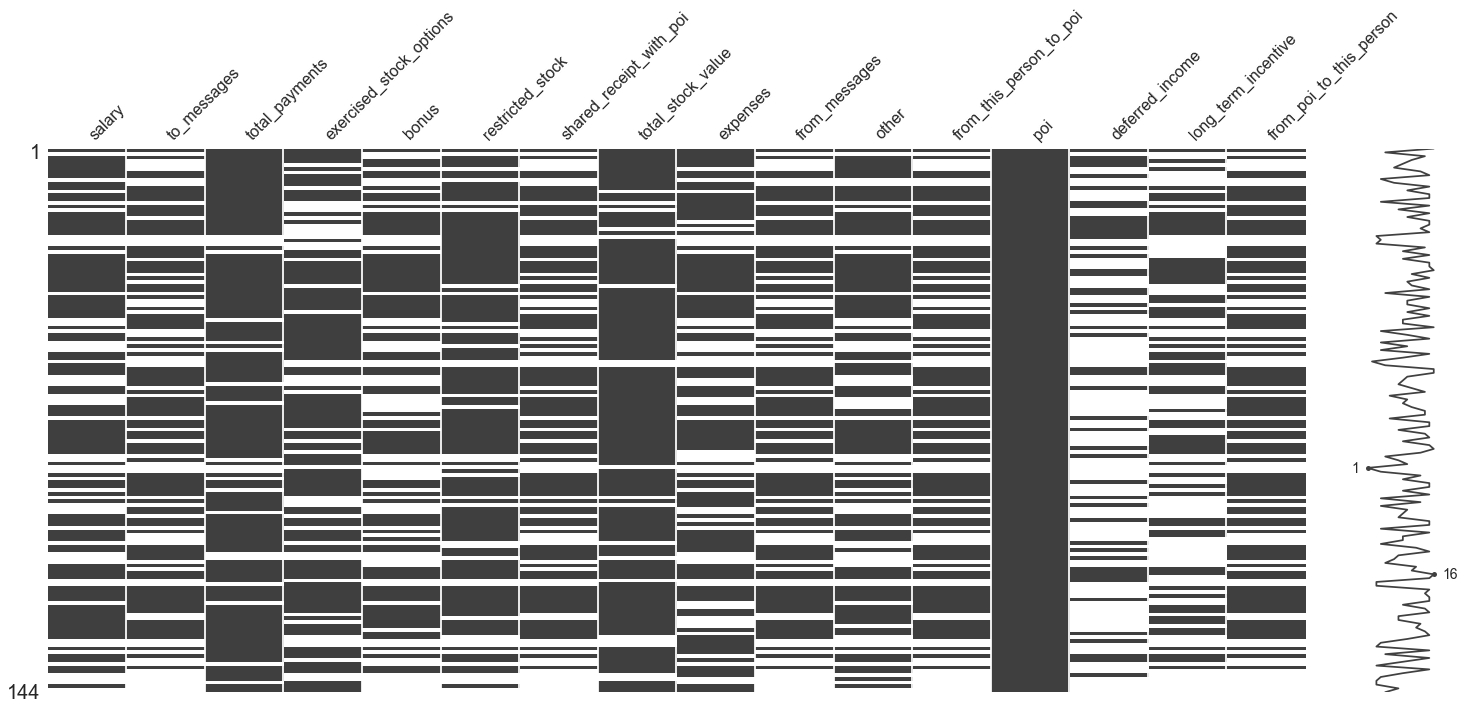

In [84]:
import missingno as msno

msno.matrix(data_df)

Missing values are displayed as white boxes in the missing data matrix. The missingness shows no obvious pattern for any feature (e.g. ). 
Since the data was collected on basis of a federal investigation, we can furthermore assume that employees were not allowed to hold back or delete any data. This also supports the notion that missingness is rather random than biased.

Furthermore, lets assess the occurence of outliers for each feature by plotting the data. Removal of potential outliers will make sure that no bias is introduced during imputation. Boxplots for each feature, comparing values for "poi" and "Regular", will provide a good overview of the underlying data distribution.   

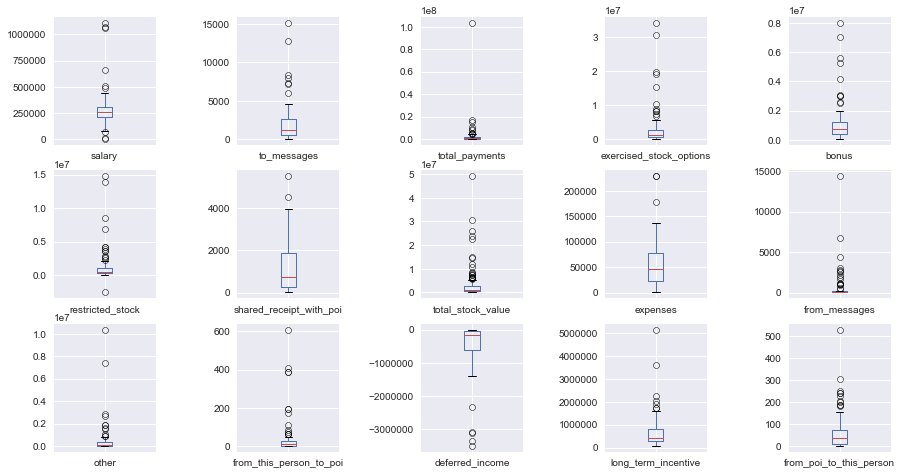

In [85]:
# manualy override the matplotlib configuration file to display outliers (in default mode outliers are not displayed)
plt.rc("lines", markeredgewidth=0.5)

data_df.drop(["poi"], axis=1).plot(kind="box", subplots=True, layout=(3,5), figsize = (15,8))
plt.subplots_adjust(wspace=0.8)

Now, let's compare the distribution of each feature for "person of interest" versus "regular person". This will provide an overview about the discriminative power of each feature. Based on this assessment, we can decide whether features can be excluded, thus, decreasing model complexity.

Basically, all features exhibit values that qualify as outliers in terms of the technical definition, which is as follows:

outlier lower end Q1 – 1.5×IQR  
outlier upper end Q3 + 1.5×IQR  

IQR = interquartile range  
Q1 = 25% quartile  
Q3 = 25% quartile  

E.g., for salary, some data points are well above \$1000000. Nevertheless, those outliers might actually reflect true values. E.g., we can assume that all data representing payments and stock values, is having disproportionally higher values for the top executives (e.g., Ken Lay, Jeffrey Skilling, etc.) as opposed for regular employees!! 

There are also values that might qualify as outliers for from_messages (e.g., > 14000 messages!!) and from_this_person_to_poi (e.g., >600 messages). With respect to these features describing email communication (from_messages, from_this_person_to_poi, from_poi_to_this_person), I have no robust expectations about reasonable nubmers of emails, etc. However, I will make the assumption that only top executives are supposed to have such high numbers. I reason that communication is a key task for major representatives of a company (even more than for regular employees), which also involves communication via email. 

Overall, one has to be very careful about defining a threshold that separates outlieres, because as already mentioned, we can expect a discrepancy in values by many orders of magnitude between regular employees, middle/upper management and top executives for features associated with financial data. 

In [86]:
data_df["salary"].quantile([0.1,0.25,0.5])

0.10    159715.8
0.25    211802.0
0.50    258741.0
Name: salary, dtype: float64

The 25% percentile and median are well above \$200,000 and even the \10% percentile is above \$150,000. If we assume \$100,000 as the average salary for upper management positions (http://work.chron.com/salaries-upperlevel-management-1899.html) then the dataset contains almost exclusively upper/top management employees! As such, outliers in the upper range are likely possible to be valid and we don't have enough information to decide otherwise, respectively.

Nevertheless, there are a few values that still don't seem to fit in the valid range, as we defined it.  
These are:  
1. value close to 0 in salary
2. value >100 million in total_payments
3. value <0 in restricted stock

*Research employees with lowest salaries*

In [87]:
# filter employees by salary < $100000
data_df["salary"][data_df["salary"] < 100000]

BANNANTINE JAMES M      477.0
BAZELIDES PHILIP J    80818.0
GRAY RODNEY            6615.0
IZZO LAWRENCE L       85274.0
OVERDYKE JR JERE C    94941.0
REDMOND BRIAN L       96840.0
REYNOLDS LAWRENCE     76399.0
WESTFAHL RICHARD K    63744.0
Name: salary, dtype: float64

The salaries of BANNANTINE JAMES M and GRAY RODNEY exhibit a stark deviation from the median salary (approx. 250000) and can't be actually considered as valid annual salaries. Let's try to shed some light by having a closer look at the CV's of Mr. Bannantine and Mr. Gray.


**BANNANTINE JAMES M**  
from http://shopops1.com/james-m-bannantine/:

*"Mr. Bannantine worked with Enron Corporation for ten years, from 1990 to 2000, holding several top management positions, including Chief Executive Officer for Enron South America, a $1.5 billion power and pipeline division of Enron."*  

Clearly, Mr. Bannantine belongs to the top management staff members. However, he was affiliated with enron's subsidiary in South America. It seems that his true salary is not listed in the documents. Maybe this is due to some accounting specifications (formality), because he was not directly affiliated with the main branch (receiving the salary from the subsidiary). This is supported by the finding that he received substantial payments for consulting service (original pdf file).

**GRAY RODNEY**  
from https://www.bloomberg.com/research/stocks/private/person.asp?personId=438862&privcapId=337480:  

*"Mr. Gray served as Chief Executive Officer of Enron Global Power & Pipelines LLC from October 1994 to 1997 and its Chairman from June 1995 to 1997. Mr. Gray served as Executive Vice President of Enron International Inc. ('EI') and has served as a Managing Director of both EDC and of Enron Capital & Trade Resources Corp. ('ECT'). Mr. Gray joined Enron Corp. in 1988 as Vice President and Treasurer."*

Enron Global Power & Pipelines LLC was another subsidiary. Similarly to Mr. Bannantine, Mr. Gray was a top executive and we can expect a much higher salary. Again, because of his affiliation to a subsidiary of enron, there is a possibility that his financial compensation was documented in enron's account books primarily by means of consulting services ($680833 based on information from the original pdf).  

Nevertheless, I expect both, Mr Gray and Mr Bannantine, to have received a regular CEO salary from their respective companies. I will substitute both values with the median salary.

In [88]:
salary_median = np.median(data_df["salary"].dropna())

data_df["salary"].loc["BANNANTINE JAMES M"] = salary_median
data_df["salary"].loc["GRAY RODNEY"] = salary_median

Confirmation of successful substitution

In [89]:
print data_df["salary"].loc["BANNANTINE JAMES M"]
print data_df["salary"].loc["GRAY RODNEY"]

258741.0
258741.0


*research the single employee with \>$100 million total payment*

In [90]:
data_df["total_payments"][data_df["total_payments"] > 1e8]

LAY KENNETH L    103559793.0
Name: total_payments, dtype: float64

As founder and former Enron CEO, Kenneth Lay may well have received this sum. But lets confirm this by summing over all financial features corresponding to Kenneth Lay and see if the sum matches the total payments value. Deviation from the total payments value would be indicative of an error/typo in the course of setting up the dataset.

In [91]:
# load the original dataset, because some features have been removed
financial_features = ["salary", "bonus", "expenses", "other", "deferred_income", "long_term_incentive",
                     "deferral_payments", "loan_advances", "director_fees"]

complete_data = pd.DataFrame.from_dict(financial_data, orient = "index")
complete_data.replace("NaN", np.nan, inplace = True)

sum(complete_data[financial_features].loc["LAY KENNETH L"].dropna())

103559793.0

The sum over all financial features matches the total payment value. I will compare the total payments value with the sum of all financial featuresfor all employees.

In [92]:
complete_data.apply(lambda row: sum(row[financial_features].dropna()) == row["total_payments"], axis=1).value_counts()

True     123
False     23
dtype: int64

23 employees exhibit a mismatch between total payments and the sum of all financial features. However, False will also be returned if the value for total payments is NaN. So let's extract only those employees having a mismatch and not NaN as total payments value. Subtraction of total payments value from the sum of financial features yields value < 0 only in case of a mismatch.

In [93]:
mismatch = complete_data.apply(lambda row: sum(row[financial_features].dropna()) - row["total_payments"], axis=1).dropna()

mismatch[mismatch != 0]

BELFER ROBERT        -201715.0
BHATNAGAR SANJAY   -15180562.0
dtype: float64

In [94]:
print complete_data.loc["BHATNAGAR SANJAY"]["total_payments"]
print complete_data.loc["BELFER ROBERT"]["total_payments"]

15456290.0
102500.0


These two employees exhibit a true mismatch between their respective total payments value versus the sum of all financial features. Looking up these two entries in original pdf file, it seems that the mismatch is due to column swap (director fees instead of total payments for Belfer Robert; Expected stock options instead of total payments for Bhatnagar Sanjay).
The wrong entries will be replaced by the sum of the financial features respectively. 

In [95]:
data_df["total_payments"].loc["BHATNAGAR SANJAY"] = sum(complete_data.loc["BHATNAGAR SANJAY"][financial_features].replace(np.nan,0))
data_df["total_payments"].loc["BELFER ROBERT"] = sum(complete_data.loc["BELFER ROBERT"][financial_features].replace(np.nan,0))

In [96]:
print data_df["total_payments"].loc["BHATNAGAR SANJAY"]
print data_df["total_payments"].loc["BELFER ROBERT"]

275728.0
-99215.0


Why is the new total payments value for Belfer Robert negative?

In [97]:
complete_data[financial_features].loc["BELFER ROBERT"].replace(np.nan,0)

salary                      0.0
bonus                       0.0
expenses                    0.0
other                       0.0
deferred_income             0.0
long_term_incentive         0.0
deferral_payments     -102500.0
loan_advances               0.0
director_fees            3285.0
Name: BELFER ROBERT, dtype: float64

The reason is that the corresponding value for deferral_payments is negative, but we know from the sneak peak at the dataset (section Check for irregularities and outliers) that deferral_payments have positive values. Let's check if employees other than Robert Belfer also have negative values as their corresponding deferral_payments values.  

In [98]:
complete_data["deferral_payments"][complete_data["deferral_payments"] < 0]

BELFER ROBERT   -102500.0
Name: deferral_payments, dtype: float64

This is only true for Robert Belfer. I conclude that the negative value is a mistake/typo and will be transformed to a positive value.

In [99]:
complete_data["deferral_payments"].loc["BELFER ROBERT"] = 102500

Confirmation of successful substitution

In [100]:
complete_data["deferral_payments"].loc["BELFER ROBERT"]

102500.0

Let's update the total payments value in the dataset that will be used throughout the project (data_df). 

In [101]:
data_df["total_payments"].loc["BELFER ROBERT"] = sum(complete_data.loc["BELFER ROBERT"][financial_features].replace(np.nan,0))

Confirmation of successful substitution

In [102]:
print data_df["total_payments"].loc["BELFER ROBERT"]

105785.0


*Research the single value <0 in restricted stock*

In [103]:
data_df["restricted_stock"][data_df["restricted_stock"] < 0]

BHATNAGAR SANJAY   -2604490.0
Name: restricted_stock, dtype: float64

Interestingly, the negative value corresponds to Bhatnagar Sanjay, who already had a negative value in the total_payments feature. This might indicate that all feature values for Bhatnagar Sanjay are erroneously negative.

In [104]:
data_df.loc["BHATNAGAR SANJAY"]

salary                             NaN
to_messages                        523
total_payments                  275728
exercised_stock_options    2.60449e+06
bonus                              NaN
restricted_stock          -2.60449e+06
shared_receipt_with_poi            463
total_stock_value                  NaN
expenses                           NaN
from_messages                       29
other                           137864
from_this_person_to_poi              1
poi                              False
deferred_income                    NaN
long_term_incentive                NaN
from_poi_to_this_person              0
Name: BHATNAGAR SANJAY, dtype: object

It appears that only the restricted stock feature has a negative value (we fixed total_payments). It will be transformed to a positive value. 

In [105]:
data_df["restricted_stock"].loc["BHATNAGAR SANJAY"] = 2.60449e+06

Confirmation of successful substitution

In [106]:
data_df["restricted_stock"].loc["BHATNAGAR SANJAY"]

2604490.0

Since we discovered multiple values having a negative value but we expect a positive value, let's check if any of the other features contain negative values (excluding deferred_income)

In [107]:
data_df.apply(lambda row: any(row < 0))

salary                     False
to_messages                False
total_payments             False
exercised_stock_options    False
bonus                      False
restricted_stock           False
shared_receipt_with_poi    False
total_stock_value           True
expenses                   False
from_messages              False
other                      False
from_this_person_to_poi    False
poi                        False
deferred_income             True
long_term_incentive        False
from_poi_to_this_person    False
dtype: bool

Now, let's examine how many data points have a negative total_stock value.

In [108]:
data_df["total_stock_value"][data_df["total_stock_value"] < 0]

BELFER ROBERT   -44093.0
Name: total_stock_value, dtype: float64

This is true for only one employee. Negative values have already been identified for Robert Belfer (see section above). This implies a systemic mistake (all negative entries) in the course of setting up the dataset. The total_stock value will be transformed into a positive value. 

In [109]:
data_df["total_stock_value"].loc["BELFER ROBERT"] = 44093.0

Confirming the correction of the total_stock_value value for Robert Belfer

In [110]:
data_df["total_stock_value"].loc["BELFER ROBERT"]

44093.0

### Imputation

MICE assumption: var are continuous and approx. normally distributed

In [111]:
from fancyimpute import MICE

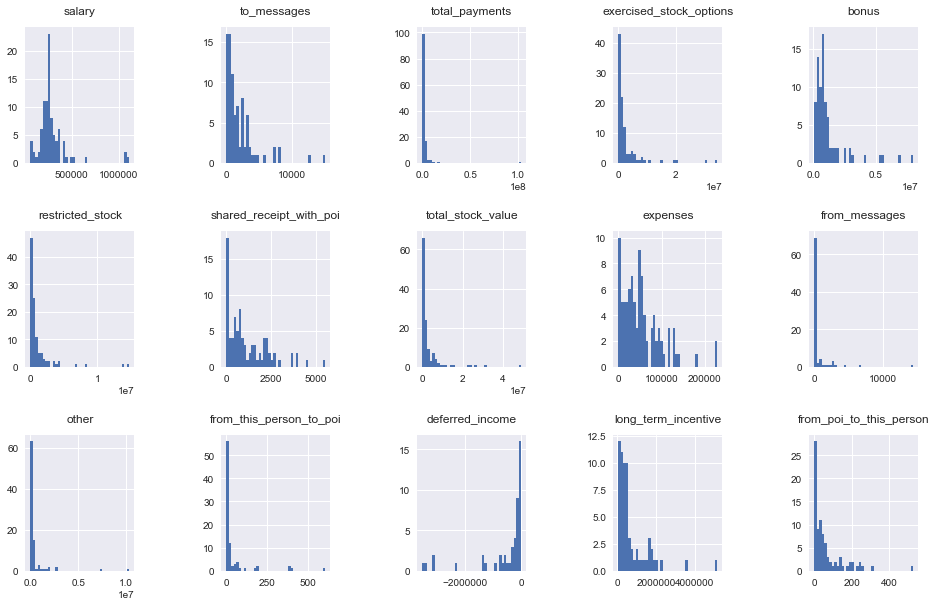

In [656]:
# arrange all features (except poi) in 3 lists, each list containing 5 features. 
#--> 3x5 will be the shape of the figure
feature_list = np.array(data_df.columns.drop(["poi"])).reshape(3,5)

# create figure object with 15 subplots (3x5 arrangement)
fig, axes = plt.subplots(3,5, sharex=False, sharey=False, figsize=(16,10))
for i in range(3):
    for j in range(5):
        # extract each feature from the main dataframe and group by "poi" 
        feature = data_df[feature_list[i][j]].dropna()
        
        # plot histogram
        axes[i,j].hist(feature.values, bins = 40)
        axes[i,j].set_title(feature_list[i][j]).set_position([.5, 1.05])
        
plt.subplots_adjust(wspace=0.8, hspace=0.5)  

I will make following assumption for the imputation procedure:  

    1. Financial data (features describing payments and stocks) is expected to have a value. E.g., salary is mandatory for employees and it makes no sense for salary to be 0 or missing. Furthermore, as I already noticed that the entire data corpus consistits of top management employees, I expect all other features related to financial data to have a value > 0 (with the exception of deferred income -negative values-).  

    2. In contrast, I expect features that are in context with email communication to have true 0 values, which I assume to be represented as NaN. Those features have been generated from a total of 0.5 Million emails from the aforementioned employees. Based solely on the large number of emails, I assume that the derived features reflect the email communication pattern very well. Furthermore, I assume that the data analyst at udacity, who performed the transformation of email data into features, did a sanaty check if NaNs for given employees are truly representative of no value for the respective employee, or if this somehow is due to mistakes in the code. As such, NaN in those features will be replaced with 0.  

    3. The correlation matrix below indicates a weak correlation between data describing email communication and financial data. Strongest correlation can be observed between financial data features. Good correlation is beneficial for imputation, because we don't care about causal relationship between those variables, but simply want accurate predictions. Therefore, I will exclude features representing email communication when conducting imputation.  

In [113]:
data_df.corr()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,deferred_income,long_term_incentive,from_poi_to_this_person
salary,1.000000,0.177177,0.589283,0.619883,0.523190,0.562643,0.274921,0.627087,0.147909,-0.010733,0.632684,0.012152,0.257609,-0.338275,0.483622,0.173847
to_messages,0.177177,1.000000,0.145492,0.079568,0.372997,0.176318,0.847990,0.120864,0.155070,0.475450,0.040580,0.568506,0.058954,-0.350815,0.134277,0.525667
total_payments,0.589283,0.145492,1.000000,0.597378,0.569054,0.626164,0.203986,0.668176,0.109798,-0.027616,0.834537,0.018946,0.237214,-0.054404,0.518498,0.168825
exercised_stock_options,0.619883,0.079568,0.597378,1.000000,0.506998,0.697974,0.154333,0.963561,0.019412,-0.066129,0.536248,-0.030101,0.503551,-0.308076,0.500016,0.160253
bonus,0.523190,0.372997,0.569054,0.506998,1.000000,0.376992,0.549102,0.509441,0.033799,0.052725,0.376371,0.354634,0.302384,-0.411659,0.625259,0.562187
restricted_stock,0.562643,0.176318,0.626164,0.697974,0.376992,1.000000,0.212713,0.855250,0.042896,-0.008696,0.647534,0.034975,0.218089,-0.133895,0.635172,0.107548
shared_receipt_with_poi,0.274921,0.847990,0.203986,0.154333,0.549102,0.212713,1.000000,0.176314,0.223495,0.230855,0.122591,0.475748,0.228313,-0.394677,0.178944,0.659264
total_stock_value,0.627087,0.120864,0.668176,0.963561,0.509441,0.855250,0.176314,1.000000,0.034707,-0.036310,0.627171,0.001289,0.366438,-0.298189,0.495485,0.146366
expenses,0.147909,0.155070,0.109798,0.019412,0.033799,0.042896,0.223495,0.034707,1.000000,0.094144,0.062874,0.014964,0.060292,0.101181,-0.100766,-0.059244
from_messages,-0.010733,0.475450,-0.027616,-0.066129,0.052725,-0.008696,0.230855,-0.036310,0.094144,1.000000,-0.101686,0.588687,-0.074308,-0.319995,-0.071958,0.186708


#### Impute financial data 

Split the dataset into subsets by poi and drop the poi feature (no relevant information for imputation). Imputation will be conducted separately for each group.   

In [706]:
poiYes_data = data_df[data_df["poi"] == True].drop(["poi"], axis = 1)
poiNo_data = data_df[data_df["poi"] == False].drop(["poi"], axis = 1)

Extract index (employee names) and column names (feature names) from each subset. Imputation will be carried out separately for both subsets. Extracted index and column names will be used to reconstruct dataframes from the imputed subsets (imputation requires numpy arrays).

In [707]:
poiYes_index = poiYes_data.index
poiNo_index = poiNo_data.index
column_names = poiYes_data.columns

I decided to apply multiple imputation on missing data, because the rate of missing data is very high for each feature. Consequently, single imputation (e.g., mean, median) would introduce a bias and strongly underestimate variance. This in turn would lead to compromised relationship between features and, thus, strongly bias model accuracy. (wrong inference because more data points assumed than actually available). 

In [708]:
poi_data_filled = MICE(n_imputations=500, verbose=False).complete(np.array(poiYes_data))
poi_data_filled = pd.DataFrame(poi_data_filled)
poi_data_filled.index = poiYes_index
poi_data_filled.columns = column_names

poi_data_filled.head(5)

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,deferred_income,long_term_incentive,from_poi_to_this_person
BELDEN TIMOTHY N,213999.0,7991.0,5501630.0,9.531360e+05,5249999.0,157569.0,5521.0,1110705.0,17355.0,484.0,210698.0,108.0,-2334434.0,1.157064e+06,228.0
BOWEN JR RAYMOND M,278601.0,1858.0,2669589.0,-8.452850e+04,1350000.0,252055.0,1593.0,252055.0,65907.0,27.0,1621.0,15.0,-833.0,9.742930e+05,140.0
CALGER CHRISTOPHER F,240189.0,2598.0,1639297.0,-3.936927e+05,1250000.0,126027.0,2188.0,126027.0,35818.0,144.0,486.0,25.0,-262500.0,3.753040e+05,199.0
CAUSEY RICHARD A,415189.0,1892.0,1868758.0,1.474799e+06,1000000.0,2502063.0,1585.0,2502063.0,30674.0,49.0,307895.0,12.0,-235000.0,3.500000e+05,58.0
COLWELL WESLEY,288542.0,1758.0,1490344.0,-3.469259e+04,1200000.0,698242.0,1132.0,698242.0,16514.0,40.0,101740.0,11.0,-144062.0,7.185085e+05,240.0


Imputation results in negative values for exercised stock options. This might be due to the skewed distribution in each features. As evident from the histogram series in the figure below, the distribution in each feature approaches normal distribution following log10 transformation. let's repeat imputation, however, using log10 scale for each feature. After imputation, features will be transformed to linear scale. 

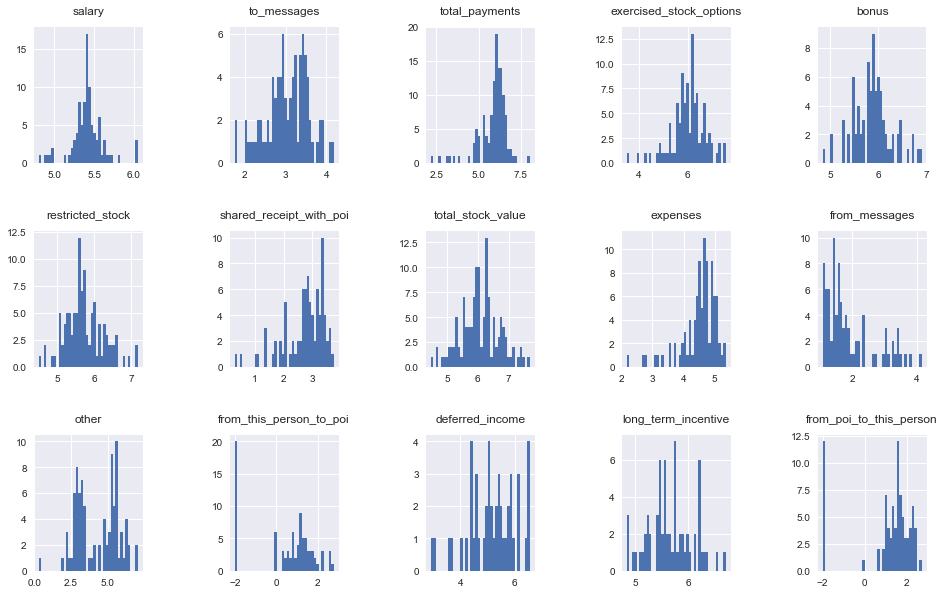

In [657]:
# create figure object with 15 subplots (3x5 arrangement)
fig, axes = plt.subplots(3,5, sharex=False, sharey=False, figsize=(16,10))
for i in range(3):
    for j in range(5):
        try:
            # extract each feature from the main dataframe and group by "poi" 
            feature = data_df[feature_list[i][j]].dropna()
            # transform 0 to non-zero values to allow log10 transformation
            feature = feature+0.01
            # convert deferred income to positive values to allow log10 transformation
            if feature_list[i][j] == "deferred_income":
                feature *= -1 
            # plot histogram
            axes[i,j].hist(np.log10(feature.values), bins = 40)
            axes[i,j].set_title(feature_list[i][j]).set_position([.5, 1.05])
        except IndexError:
            continue
plt.subplots_adjust(wspace=0.8, hspace=0.5)  

In [712]:
def MultipleImputation(dataset, index):
    
    # make copy of original dataset to prevent changes in original dataset
    dataset_copy = dataset.copy()
    drop_columns = ["to_messages", "shared_receipt_with_poi", "from_messages", 
                    "from_this_person_to_poi", "from_poi_to_this_person"]
    
    # convert deferred_income to positive values in order to allow log10 transformation
    dataset_copy["deferred_income"] *= -1
    # remove features describing email communication, because they are unlikely related to financial data
    data_log = np.log10(dataset_copy.drop(drop_columns, axis=1))

    data_filled = MICE(n_imputations=500, verbose=False).complete(np.array(data_log))
    data_filled = pd.DataFrame(data_filled)
    data_filled.index = index
    data_filled.columns = data_log.columns

    # transform back to linear scale
    data_filled = 10**data_filled
    # merge financial and enail communication parts of the dataset back to one main dataset
    complete_data_filled = pd.concat([data_filled, dataset_copy[drop_columns]], axis = 1)
    # convert deferred_income back to negative values (original values)
    complete_data_filled["deferred_income"] *= -1
    
    return complete_data_filled
    
poi_data_filled = MultipleImputation(poiYes_data, poiYes_index)  
poi_data_filled.head(5)

,salary,total_payments,exercised_stock_options,bonus,restricted_stock,total_stock_value,expenses,other,deferred_income,long_term_incentive,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,from_poi_to_this_person
BELDEN TIMOTHY N,213999.0,5501630.0,9.531360e+05,5249999.0,157569.0,1110705.0,17355.0,210698.0,-2334434.0,651442.184925,7991.0,5521.0,484.0,108.0,228.0
BOWEN JR RAYMOND M,278601.0,2669589.0,8.882635e+05,1350000.0,252055.0,252055.0,65907.0,1621.0,-833.0,974293.000000,1858.0,1593.0,27.0,15.0,140.0
CALGER CHRISTOPHER F,240189.0,1639297.0,4.590147e+05,1250000.0,126027.0,126027.0,35818.0,486.0,-262500.0,375304.000000,2598.0,2188.0,144.0,25.0,199.0
CAUSEY RICHARD A,415189.0,1868758.0,2.837921e+06,1000000.0,2502063.0,2502063.0,30674.0,307895.0,-235000.0,350000.000000,1892.0,1585.0,49.0,12.0,58.0
COLWELL WESLEY,288542.0,1490344.0,1.429585e+06,1200000.0,698242.0,698242.0,16514.0,101740.0,-144062.0,527903.862377,1758.0,1132.0,40.0,11.0,240.0


Following transformation to log10 scale, multiple imputation returns reasonable (positive) values for excercised stock options. So let's apply the same imputation strategy to data related to regular employees (not poi).

*before imputation of non-poi values*

In [715]:
data_df[data_df["poi"] == False].head(5)

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,deferred_income,long_term_incentive,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,False,-3081055.0,304805.0,47.0
BADUM JAMES P,NaN,NaN,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,False,NaN,NaN,NaN
BANNANTINE JAMES M,258741.0,566.0,916197.0,4046157.0,NaN,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,False,-5104.0,NaN,39.0
BAXTER JOHN C,267102.0,NaN,5634343.0,6680544.0,1200000.0,3942714.0,NaN,10623258.0,11200.0,NaN,2660303.0,NaN,False,-1386055.0,1586055.0,NaN
BAY FRANKLIN R,239671.0,NaN,827696.0,NaN,400000.0,145796.0,NaN,63014.0,129142.0,NaN,69.0,NaN,False,-201641.0,NaN,NaN


*after imputation of non-poi values*

In [713]:
not_poi_data_filled = MultipleImputation(poiNo_data, poiNo_index)
not_poi_data_filled.head(5)

,salary,total_payments,exercised_stock_options,bonus,restricted_stock,total_stock_value,expenses,other,deferred_income,long_term_incentive,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.000000,4484442.0,1.729541e+06,4.175000e+06,1.260270e+05,1729541.0,13868.0,1.520000e+02,-3.081055e+06,3.048050e+05,2902.0,1407.0,2195.0,65.0,47.0
BADUM JAMES P,181619.417477,182466.0,2.578170e+05,3.315269e+05,2.407471e+05,257817.0,3486.0,5.997834e+03,-7.877330e+04,2.123914e+05,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,258741.000000,916197.0,4.046157e+06,6.416821e+05,1.757552e+06,5243487.0,56301.0,8.645230e+05,-5.104000e+03,4.153852e+05,566.0,465.0,29.0,0.0,39.0
BAXTER JOHN C,267102.000000,5634343.0,6.680544e+06,1.200000e+06,3.942714e+06,10623258.0,11200.0,2.660303e+06,-1.386055e+06,1.586055e+06,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,239671.000000,827696.0,1.580063e+05,4.000000e+05,1.457960e+05,63014.0,129142.0,6.900000e+01,-2.016410e+05,2.290322e+05,NaN,NaN,NaN,NaN,NaN


The non-poi subset values are as expected following the aforementioned imputation technique. 

#### Merge datasets and Impute data related to email communication

As noted, NaN in features associated with email communication will be set to 0, as we can expect that missing values truly represent 0 values (see previous section).

In [723]:
data_df = pd.concat([poi_data_filled, not_poi_data_filled], axis = 0)
data_df = data_df.replace(np.nan, 0)

In [733]:
print "BEFORE IMPUTATION"
print "\n"
print poiNo_data.loc["BADUM JAMES P"]
print "\n\n"
print "AFTER COMPLETE IMPUTATION"
print "\n"
print data_df.loc["BADUM JAMES P"]

BEFORE IMPUTATION


salary                          NaN
to_messages                     NaN
total_payments             182466.0
exercised_stock_options    257817.0
bonus                           NaN
restricted_stock                NaN
shared_receipt_with_poi         NaN
total_stock_value          257817.0
expenses                     3486.0
from_messages                   NaN
other                           NaN
from_this_person_to_poi         NaN
deferred_income                 NaN
long_term_incentive             NaN
from_poi_to_this_person         NaN
Name: BADUM JAMES P, dtype: float64



AFTER COMPLETE IMPUTATION


salary                     181619.417477
total_payments             182466.000000
exercised_stock_options    257817.000000
bonus                      331526.864821
restricted_stock           240747.098039
total_stock_value          257817.000000
expenses                     3486.000000
other                        5997.833784
deferred_income            -78773.303229
long

Comparing a data point ("BADUM JAMES P") before and after final imputation confirms the validity of the remerged dataset, which is to be used in downstream steps. 

### Creating new features

A new feature will be created that is based on word frequencies (TF-IDF) derived from email communication. Word frequencies will be obtained by analysing enron's email corpus (dataset containing emails from enron employees) using natural language processing techniques. I will focus on emails written by enron employees, however, this analysis can easily be extended by emails received by each employee.
Email authors will be identified by the email address specified by "From:" within each raw email body (string containing metadata as well as the actual text). 
 
#### Extracting all available email addresses for each employee 
For poi employees there are multiple valid email addresses (obtained via execution of poiEmails()), however, the main dataset (data_df or complete_df) is listing only one address. In order to be sure that all poi emails can be identified from the email corpus, a dictionary will be created to store all available poi email addresses (dict key) by the correponding poi name (dict value). As such, extracted email addresses can be used to verify if those emails have been written by enron employees. Furthermore, this dictionary will be expanded by non-poi email addresses to record all available email addresses for all enron employees present in the main dataset (data_df or complete_df).  

In [120]:
# import function poiEmails() that returns all email addresses for poi employees
from poi_email_addresses import poiEmails
poi_emails = poiEmails()

def EmployeeEmails(set1, set2):
    '''
    iterate over email addresses from the maindataset (complete_df) and poi_emails (list of multiple email 
    addresses for each poi) datasets and assign each address to the coresponding employee name.
    The function will return a dictionary with email and employee name as key:value pairs.
    
    set1: poi_emails dataset
    set2: main dataset
    '''
    
    # create a key:value pair for listed emails in in the poi_emails dataset (set1) 
    #--> key = email address; value = employee name
    email_by_name = dict()
    
    for email in set1:
        for index in set2.index:
            name = index.split()[0].lower()
            if name in email:
                email_by_name[email] = index

    # create a key:value pair for listed emails in the main dataset (set2) 
    #--> key = email address; value = employee name
    email_names_df = set2[["email_address"]].dropna().reset_index()   
    for index in range(len(email_names_df)):
        email_address = email_names_df["email_address"][index]
        name = email_names_df["index"][index]
    
        if email_address not in email_by_name.keys():
            email_by_name[email_address] = name  
            
    return email_by_name        
        
            
email_by_name = EmployeeEmails(poi_emails, complete_data)           

In [215]:
email_by_name

{"'bowen@enron.com": 'BOWEN JR RAYMOND M',
 "'david.delainey'@enron.com": 'DELAINEY DAVID W',
 "'delainey@enron.com": 'DELAINEY DAVID W',
 'a..martin@enron.com': 'MARTIN AMANDA K',
 'adam.umanoff@enron.com': 'UMANOFF ADAM S',
 'andrew.fastow@enron.com': 'FASTOW ANDREW S',
 'andrew.s.fastow@enron.com': 'FASTOW ANDREW S',
 'andy.fastow@enron.com': 'FASTOW ANDREW S',
 "ben'.'glisan@enron.com": 'GLISAN JR BEN F',
 'ben.glisan@enron.com': 'GLISAN JR BEN F',
 'ben_f_glisan@enron.com': 'GLISAN JR BEN F',
 'bglisan@enron.com': 'GLISAN JR BEN F',
 'bill.cordes@enron.com': 'CORDES WILLIAM R',
 'bob.butts@enron.com': 'BUTTS ROBERT H',
 'brian.redmond@enron.com': 'REDMOND BRIAN L',
 'calger@enron.com': 'CALGER CHRISTOPHER F',
 'ccalger@enron.com': 'CALGER CHRISTOPHER F',
 'charlene.jackson@enron.com': 'JACKSON CHARLENE R',
 'chip.cox@enron.com': 'COX DAVID',
 'chris.calger@enron.com': 'CALGER CHRISTOPHER F',
 'christopher.calger@enron.com': 'CALGER CHRISTOPHER F',
 'cindy.olson@enron.com': 'OLSON 

The dictionary storing all emails seems to be of wanted structure.  
- multiple email addresses for single employees 
- email address pointing to cognate employee name

#### Extracting file paths directing to emails written by each employee
The absolute paths will be extracted for each email that has been written by enron employees. For each employee, a key:value entry will be defined within a dictionary. The employee's name will be assigned as the key, whereas a list storing all email paths for that particular employee will be assigned as the cognate value.

Expected data structure:  
*{name1:[path1, path2], name2:[path1, path2], ...}*

In [121]:
# path to directory that contains the email dataset; for each employee there is a separate subdirectory within root
root = "/Users/damirvana/Coursera_EDX/UDACITY_Data_Analyst_Nanodegree/P5_Machine_Learning/maildir"

# small subset of email to test the functions
#root = "/Users/damirvana/Coursera_EDX/UDACITY_Data_Analyst_Nanodegree/P5_Machine_Learning/maildir_test_copy"

def ExtractEmailAdress(file_in):
    '''
    returns the email address of the sender from a given email body
    
    file_in: file object (accessed via open() function)
    '''
    
    email_text = file_in.read()
    meta_ref = re.compile(r"From:.+(?=\s)")
    meta = re.search(meta_ref, email_text)
    email_address = meta.group().split(":")[1].strip()
    
    return email_address
       


def IdentifyAuthor(address, email_set):
    '''
    checks whether an email address belongs to an enron employee from the dataset. 
    If true, employee name is returned.
    
    address: extracted sender email address
    email_set: dataset containing all email addresses associated with an enron employee
    '''
    
    try: 
        from_employee = email_set[address]
        return from_employee
    except KeyError:
        return False
          
    
    

def ExtractPath(maildir, email_set):
    
    '''
    Returns for each enron employee present in the main dataset a list containing all paths to emails that have been 
    written by the cognate employee.
    
    maildir: root path to the folder containing the email dataset (each employee as a subfolder within root)
    email_set: dataset containing all email addresses associated with an enron employee
    
    '''
    
    email_sender = defaultdict(list)

    for paths, subdirs,  files in os.walk(maildir):
        for email in files:
            if not email.startswith("."):
                
                path = os.path.join(paths, email)
                email_file = open(path)
                address = ExtractEmailAdress(email_file)
                author = IdentifyAuthor(address, email_set)
                
                if author:
                    email_sender[author].append(path)
                    
                email_file.close() 
            
    return email_sender





from_email_paths = ExtractPath(root, email_by_name)

In [738]:
from_email_paths

defaultdict(list,
            {'ALLEN PHILLIP K': ['/Users/damirvana/Coursera_EDX/UDACITY_Data_Analyst_Nanodegree/P5_Machine_Learning/maildir_test_copy/allen-p/sent/1.',
              '/Users/damirvana/Coursera_EDX/UDACITY_Data_Analyst_Nanodegree/P5_Machine_Learning/maildir_test_copy/allen-p/sent/2.',
              '/Users/damirvana/Coursera_EDX/UDACITY_Data_Analyst_Nanodegree/P5_Machine_Learning/maildir_test_copy/allen-p/sent/3.']})

Using a small subset of the email corpus confirms that the dictionary is of appropriate structure and really contains all emails written by a particular employee.
Now we can use the entire corpus, run the code and save the dictionary using pickle (this will preserve the data structure). This file will be used to access all emails in the course of applying natural language techniques.

In [303]:
with open("from_email_paths.pl", "wb") as file_out:
    pickle.dump(from_email_paths, file_out)

Load the dataset containing extracted email paths from the entire email corpus.

In [75]:
with open("from_email_paths.pl", "r") as file_in:
    from_email_paths = pickle.load(file_in)

#### Define procedures to clean email text
As already stated, the goal is to derive TF-IDF values for the set of words pused in each email document. This requires prior cleaning of raw text according to some user defined rules in order to calculate most reasonable TF-IDF values. Remember the rule for machine learning-based analysis, **GARBAGE IN, GARBAGE OUT**! 

In [753]:
def CleanEmailConversation(email, identifier = None, found_identifier = None):
    
    '''
    In a recursive approach checks for identifier ("From:", "To:", "cc:", "Subject:") in an email conversation (multiple email replies)
    and removes identifier and the corresponding values.
    Returns native (if email not part of a conversation set) or cleaned (email part of a conversation set) email version.
    
    email: email text body as (file object accessed via open() function); string
    identifier: type of email identifier; None or string
    found identifier: identifier present in an email; None or list of strings
    '''
   
    remove = ["From:", "To:", "cc:", "Subject:"]
    
    if found_identifier == None:
        found_identifier = []
        for identifier in remove:
            for match in re.finditer(identifier, email):
                found_identifier.append(match.group())
    
    
    if len(found_identifier) == 0:
        return email
    
    else:
        # use first item from the list storing identifier and remove it from the list
        identifier_ref = found_identifier.pop(0)
        # apply recursive search and clean for identifier and corresponding values
        email_clean = RemoveIdentifier(identifier_ref, email)
        return CleanEmailConservation(email_clean, identifier = identifier_ref, found_identifier = found_identifier)
        
        
        
def RemoveIdentifier(identifier_ref, email):
    
    '''
    applies regular expression (regex) logic to find and remove email conversation identifier.  
    
    identifier_ref: type of email identifier as reference for regex; string
    email: email text body as (file object accessed via open() function); string
    '''
    
    if identifier_ref == "From:": 
        # check From: line 
        regex_ref = re.compile(r"From:(\W.{0,}(\n.{0,}){0,}(?=To:)|(?=\n))")  
        mail = re.sub(regex_ref,"",email)
        
    elif identifier_ref == "To:":    
        # check To: line
        regex_ref = re.compile(r"To:(\W.{0,}(\n.{0,}){0,}(?=cc:)|(?=\n))") 
        mail = re.sub(regex_ref,"",email)
        
    elif identifier_ref == "cc:":    
        # check cc: line
        regex_ref = re.compile(r"cc:(\W.{0,}(\n.{0,}){0,}(?=Subject:)|(?=\n))") 
        mail = re.sub(regex_ref,"",email)
        
    elif identifier_ref == "Subject:": 
        # check Subject: line
        regex_ref = meta_ref = re.compile(r"Subject:(\W.{0,}|(?=\n))") 
        mail = re.sub(regex_ref,"",email)
        
    return mail


In [754]:
def CleanForwardedEmail(email):
    '''
    Checks if email was forwarded and, when necessary, removes the string that depicts a forwarded email from the
    email body. 
    Returns native (if not forwarded email) or cleaned (if forwarded email) email version.
    
    email: email text body as (file object accessed via open() function); string
    '''
    
    # search for following type of substring: 
    #--> ---------------------- Forwarded by David W Delainey/HOU/ECT on 12/12/2000 12:30 PM ---------------------------
    # look for at least 5 dash literals in order to prevent removal of email text passages that use dash
    meta_ref = re.compile(r"-{5,}[\w\d\W]+-{5,}")
    return re.sub(meta_ref,"", email)
    
    
def RemoveMetaData(email):
    '''
    Removes meta data from an email (fields denoting sender, recepient, etc.). 
    Returns plain email text. 
    
    email: email text body as (file object accessed via open() function); string
    '''
    
    # define position within email that indicates the start of the actual text body 
    # --> text is preceded by metadata
    meta_ref = re.compile(r"X-FileName.+\s+")  
    meta = re.search(meta_ref,email)
    # first item in content list contains metadata, second item contains the text body
    return email.split(meta.group())
    
    
def CleanWhitespace(email):
    '''
    Replaces all whitespace literals (tab, new line, etc.) with space literal, which helps to remove names from 
    emails after stemming. 
    Returns native (if no whitespace literals) or cleaned (if whitespace literals) email version. 
    
    email: email text body as (file object accessed via open() function); string
    '''
    
    re_ref = re.compile(r"\s+")
    return re.sub(re_ref," ",email)
    

In [582]:
def EmployeeNames(dataset):
    '''
    Extracts the stemmed variant of employee first and second names from the main dataset (data_df). 
    This set will be used as a reference to remove employee names from an email.
    Returns a set of stemmed employee first and second names
    
    dataset: main dataset; dataframe
    '''
    
    stemmer = SnowballStemmer("english")
    names = set()
    
    for name in dataset.index:
        name = name.split()
        # sort split name according to string length and pick only the two largest strings 
        #--> makes sure that middle name and/or generation titles are omitted
        name = sorted(name, key = len, reverse = True)
        names.add(stemmer.stem(name[0]))
        names.add(stemmer.stem(name[1]))
    
    return names

employee_names = EmployeeNames(data_df)     


In [755]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def ParseText(email):
    
    email_text = email.read()
    
    content = RemoveMetaData(email_text)
    
    words = ""
    # check if the email body actually contains text after removal of meta data
    if len(content) > 1:
        
        content = CleanForwardedEmail(content[1])
        content = CleanEmailConversation(content)
        content = CleanWhitespace(content)
    
        # remove punctuation from text
        text_string = content.translate(string.maketrans("",""), string.punctuation)
        
        # remove stop words
        stop_words = stopwords.words("english")
        filtered_text = [word for word in text_string.split() if not word in stop_words]
        
        
        # transform words in text to root words by stemming
        stemmer = SnowballStemmer("english")
        stemmed_text = []
        for word in filtered_text:
            word_stemmed = stemmer.stem(word)
            if word_stemmed in employee_names:
                continue
            stemmed_text.append(word_stemmed)
            
        words = " ".join(stemmed_text)
        
    return words     
            
def ProcessEmail(email_paths, dataset):
    
    from_data = []
    word_data = []
    
    for employee in email_paths.keys():
        for path in email_paths[employee]:
            
            email = open(path, "r")
            processed_text = ParseText(email)
            word_data.append(processed_text)
            from_data.append(employee)
            email.close()
                
            
    return word_data, from_data      
            
            
        
word_data, from_data = ProcessEmail(from_email_paths, data_df)   

Text cleaning will be conducted in iterative steps:  
*first iteration*  
1. Remove meta data (message-id, from:, to:, subject:, etc.) present in emails


Save tokenized variants of the email dataset and the name of each corresponding author.

In [79]:
with open("nlp_emails_tokenized.pl", "wb") as file_out:
    pickle.dump(word_data, file_out)
    
with open("nlp_emails_authors.pl", "wb") as file_out:
    pickle.dump(from_data, file_out)

If required, load email authors and tokenized email datasets.

In [50]:
with open("nlp_emails_authors.pl", "r") as file_in:
    from_data = pickle.load(file_in)
    
with open("nlp_emails_tokenized.pl", "r") as file_in:
    word_data = pickle.load(file_in)

Calculate TF-IDF values for the tokenized email dataset

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
word_bag = vectorizer.fit_transform(word_data)
len(vectorizer.get_feature_names())

65210

I want to expand the main dataset, which consists of 15 features (after filtering), by TF-IDF values as novel features. The TF-IDF features are extremely high dimensional with a bag of words representation storing 65210 words as features. If I simply include all TF-IDF features they would strongly outweigh the features from the main dataset. As such, I want to limit the number of TF-IDF features to be included to approximately 20.  

Strategy to select TF-IDF features:  
1. use pipeline and gridsearch to estimate optimal parameter for TfidfVectorizer (first level of feature selection) 
2. use feature selection (SelectKBest or PCA)

Define a custom transformer to transform scarse matrix output from Tfidfvectorizer() to dense matrix, which is required for naive bayes classifier.

In [52]:
from sklearn.base import TransformerMixin, BaseEstimator

class MatrixTransformer(BaseEstimator,TransformerMixin):
    
    def transform(self, X, y=None, **fit_params):
        dense_matrix = X.todense()
        return dense_matrix
    
    def fit(self, X, y=None, **fit_params):
        return self

Using the entire email dataset to estimate the best hyperparameter for TF-IDF vectorizer takes too much computation time. Therefore, a smaller subset will be used.

We already know that the main dataset is highly skewed with regard to the number of samples for poi versus non poi class (only a few poi instances). First, lets check how many poi samples (emails from poi employees) are included in the processed email dataset, in order to have an upper bound on the size of the subset (equal subset size will be used). 

In [53]:
print "total number of emails: ", len(word_data)
print "number of emails from poi employees: ", sum(word_data_class)

total number of emails:  52503
number of emails from poi employees:  4254


Out of 52503 emails in total, 4254 emails have been authored by poi employees. A random subset containing each 1000 emails from poi and non poi employees, respectively, will be used. This is likely still not enough data to avoid overfitting. However, using the entire email dataset is impractical (long computation time) for hyperparameter evaluation.

In [82]:
import random 

non_poi_class = []
poi_class = []

# filter poi versus non poi classes from the word_data_class dataset and keep the original index from the dataset
# --> this is essential to preserve the correct association between email and the corresponding author (via index) 
for idx, employee_class in enumerate(word_data_class):
    if employee_class == 0:
        non_poi_class.append((idx, employee_class))
    else:
        poi_class.append((idx, employee_class))

# take a random sample (500 instances) from each class        
non_poi_class_rnd = random.sample(non_poi_class, 500)
poi_class_rnd = random.sample(poi_class, 500)  

# combine both samples and shuffle (necessary to avoid any bias in downstream modelling)
class_combined = non_poi_class_rnd + poi_class_rnd
random.shuffle(class_combined)

# extract the emails from the dataset that correspond to the index provided in the sampled class data
# make email data subset and author data subset 
word_data_sub = [word_data[idx[0]] for idx in class_combined]
word_data_class_sub = [idx[1] for idx in class_combined]

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB


parameters = {
    "tfidf__ngram_range" : ((1,1),(1,2),(1,3)),
    "tfidf__max_df": (0.2,0.4,0.6)
}


pipeline = Pipeline([
    
    ("tfidf", TfidfVectorizer()),
    ("to_dense", MatrixTransformer()),
    ("KBest", SelectKBest(score_func=f_classif, k=40)),
    ("clf", GaussianNB()),
])



grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(word_data_sub, word_data_class_sub)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=Tru...electKBest(k=40, score_func=<function f_classif at 0x11add4c08>)), ('clf', GaussianNB(priors=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'tfidf__max_df': (0.2, 0.4, 0.6), 'tfidf__ngram_range': ((1, 1), (1, 2), (1, 3))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

The following TF-IDF hyperparameter values give the best prediction scores. 

In [84]:
grid_search.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.4, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=Tru...electKBest(k=40, score_func=<function f_classif at 0x11add4c08>)), ('clf', GaussianNB(priors=None))])

I would like to filter those 40 best TF-IDF features, in order to subjectively evaluate their "predictive power". I suspect that employees' names will be amongst the selected features. However, names are not very well suited as features for a generalized model if it's supposed to predict fraud based on a new dataset not related to enron!!  

In [85]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.6)
email_fitted = vectorizer.fit_transform(word_data_sub)

In [86]:
selector = SelectKBest(score_func=f_classif, k=40)
email_selected = selector.fit_transform(email_fitted.todense(), word_data_class_sub)

In [87]:
for idx in selector.get_support(indices = True):
    print vectorizer.get_feature_names()[idx]

dave
david
david delainey
david delaineyhouect
david delaineyhouectect
deal
delainey
delainey forward
delaineyhouect
delaineyhouectect
delaineyhouectect cc
dietrichhouectect
ena
ensur
forward david
forward steven
forward vinc
guy
janet
janet dietrichhouectect
kaminski
kaminskihouect
kaminskihouectect
kaminskihouectect cc
keannaenron
regard
regard delainey
salli
steven
steven keannaenron
structur
tim
to david
to vinc
valu
vinc
vinc forward
vinc kaminskihouect
vinc kaminskihouectect
wes


As anticipated, the majority of the best 40 TF-IDF feature set refers to employee names. 